## K Means Objective

K Means is a clustering algorithm, where it takes datapoints are split into k clusters based on their euclidean distnacees.

1. We will have k-subsets
2. Each data point will be assigned to a subset.
3. Clusters will not overlap

### Goodness of cluster
Generally speaking, the closer the data points of a cluster are grouped together, the better (low variability).
Mathematically, for any cluster assignment, we define:

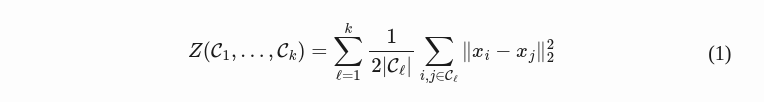

Z is a reference to how good is the clustering. The lower Z gets, the better the clustering is.

C stands for a cluster, and x's are data points in each cluster.

The above equation can be rewritten in terms of the centroid $\mu$ of each cluster.

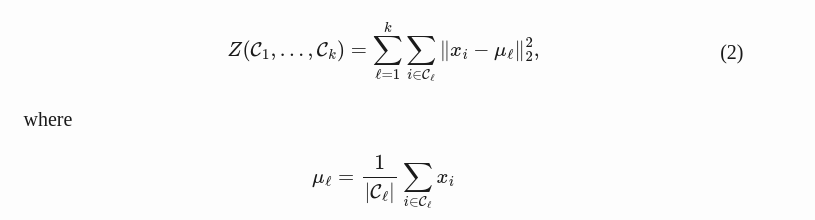

Thus our task woul be to minimize the above $Z$ value.

The algorithm used to converge to the minimum $Z$ value is called Lloyd's algorithm.
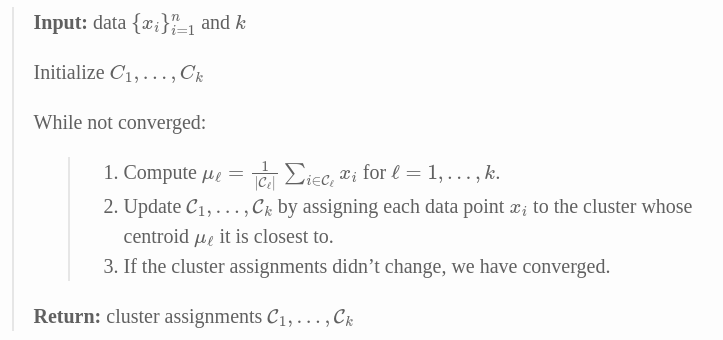

In [180]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [222]:

class KMeansMine:
    def __init__(self, k) -> None:
        self.k = k
        self.clusters = [ {} for i in range(k)]
        self.data = np.empty(0)
        self.centroids = []

    def fit(self,X):
        m,n = X.shape
        centroids = X[np.random.choice(m,self.k)]
        diff = True
        previous_class = np.zeros(m)
        while(diff):
            class_ = self.classify(X, centroids)
            centroids = self.compute_centroids(X, class_)
            diff = (np.sum(previous_class-class_)!=0)
            print(diff)
            previous_class = class_
            self.centroids = centroids
        return self.centroids, class_
        
    def classify(self, X, centroids):
        # Find label (centroid) for each data point 
        m = X.shape[0]
        class_ = np.zeros(m)
        for i in range(m):
            distance = []
            for j in range(centroids.shape[0]):
                norm_ = np.linalg.norm(X[i]-centroids[j])
                distance.append(norm_)
            class_[i] = np.argmin(distance)
        return class_
    
    def compute_centroids(self, X, class_):
        m,n = X.shape
        centroids = np.zeros((self.k,n))
        for k in range(self.k):
            points = X[class_==k]
            centroids[k] = np.mean(points, axis=0)
        return centroids


In [223]:
# Load Dataset
data = load_iris()
x = data['data']
y = data['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8)
model = KMeans(n_clusters=3)
model.fit(x_train)

/home/jawstan/ML-Quest/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [224]:

model.cluster_centers_

array([[5.86530612, 2.72244898, 4.4122449 , 1.44693878],
       [4.9925    , 3.425     , 1.475     , 0.2525    ],
       [6.84516129, 3.07741935, 5.7516129 , 2.07741935]])

In [225]:
model2 =KMeansMine(k=3)
model2.fit(x_train)

True
True
False


(array([[6.84516129, 3.07741935, 5.7516129 , 2.07741935],
        [5.86530612, 2.72244898, 4.4122449 , 1.44693878],
        [4.9925    , 3.425     , 1.475     , 0.2525    ]]),
 array([0., 1., 1., 1., 2., 0., 1., 2., 0., 2., 1., 0., 1., 0., 2., 0., 1.,
        0., 0., 1., 1., 2., 1., 0., 2., 1., 2., 0., 0., 1., 0., 2., 1., 2.,
        1., 1., 2., 0., 1., 1., 1., 2., 2., 2., 0., 1., 2., 1., 2., 2., 1.,
        1., 2., 0., 0., 2., 0., 2., 1., 0., 1., 1., 2., 2., 1., 1., 0., 1.,
        0., 2., 0., 1., 0., 1., 2., 1., 1., 1., 1., 2., 2., 0., 2., 0., 1.,
        1., 1., 1., 0., 2., 1., 1., 2., 0., 2., 2., 2., 1., 2., 1., 1., 0.,
        1., 2., 0., 2., 1., 0., 2., 2., 0., 2., 1., 2., 1., 1., 2., 0., 2.,
        1.]))

<!-- TODO Spectral Clustering -->